**Elgamal**

a = 19600247
p = 10000000000000000051
alpha = 2
k = 169427
x = 1284457829706343127

In [54]:
a = 19600247
p = 10000000000000000051
alpha = 2
k = 169427
x = 1284457829706343127

# Tính lại beta, y1, y2
beta = mod_exp(alpha, a, p)
y1 = mod_exp(alpha, k, p)
y2 = (x % p * mod_exp(beta, k, p)) % p
print(f"beta:{beta}")
print(f"y1:{y1}")
print(f"y2:{y2}")
print(f"x:{(y2*mod_exp(y1,p-a-1,p))%p}")
s = mod_exp(y1, a, p)          # s = y1^a mod p  (== beta^k)
inv_s = modinv(s, p)           # nghịch đảo bằng extended euclid
if inv_s is None:
    print("Không tồn tại nghịch đảo: gcd(s, p) != 1")
else:
    recovered = (y2 * inv_s) % p
    print("recovered:", recovered, "== x ?", recovered == x)

beta:3616277393192918737
y1:5653068519108444572
y2:9417956054024110647
x:1284457829706343127
recovered: 1284457829706343127 == x ? True


**Đường cong eliptic**

Số điểm trên đường cong: 773
Các điểm: [(1, 328), (1, 499), (2, 173), (2, 654), (5, 380), (5, 447), (6, 392), (6, 435), (10, 279), (10, 548), (15, 176), (15, 651), (17, 61), (17, 766), (19, 388), (19, 439), (20, 326), (20, 501), (21, 279), (21, 548), (22, 125), (22, 702), (24, 390), (24, 437), (26, 263), (26, 564), (27, 318), (27, 509), (28, 259), (28, 568), (29, 87), (29, 740), (30, 243), (30, 584), (33, 20), (33, 807), (36, 325), (36, 502), (37, 233), (37, 594), (38, 39), (38, 788), (39, 227), (39, 600), (41, 299), (41, 528), (44, 6), (44, 821), (49, 346), (49, 481), (51, 232), (51, 595), (54, 139), (54, 688), (55, 295), (55, 532), (57, 112), (57, 715), (59, 226), (59, 601), (60, 137), (60, 690), (64, 213), (64, 614), (65, 6), (65, 821), (67, 186), (67, 641), (69, 36), (69, 791), (73, 292), (73, 535), (76, 48), (76, 779), (79, 371), (79, 456), (81, 182), (81, 645), (83, 50), (83, 777), (85, 243), (85, 584), (86, 254), (86, 573), (88, 191), (88, 636), (91, 159), (91, 668), (92, 41), (

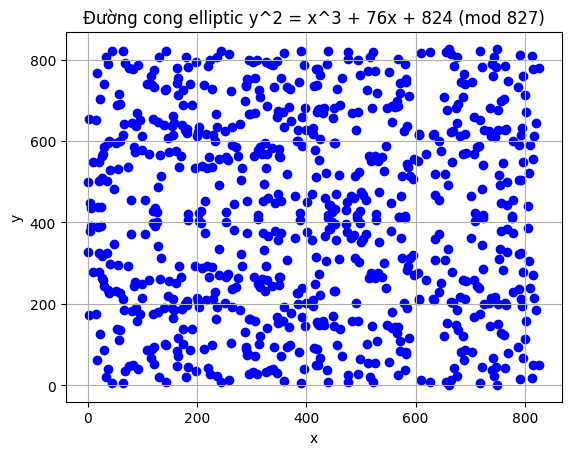

In [74]:
import matplotlib.pyplot as plt

flag = False
for i in range (1,1000):
    if flag == True:
        break
    for j in range (1,1000):
            # -------- 1. Chọn trường và thông số đường cong --------
        p = 827   # số nguyên tố (trường hữu hạn F_p)
        a = 76
        b = 824

        # Kiểm tra đường cong không suy biến: 4a^3 + 27b^2 != 0 mod p
        if (4*a**3 + 27*b**2) % p == 0:
            continue

        # -------- 2. Tìm tất cả các điểm trên EC --------
        points = []

        for x in range(p):
            rhs = (x**3 + a*x + b) % p  # y^2 = x^3 + ax + b (mod p)
            for y in range(p):
                if (y*y) % p == rhs:
                    points.append((x, y))

        # Thêm điểm vô cực (O)
        points.append(("O", "O"))
        flag = is_prime(len(points))
        if flag == True:
            print(f"Số điểm trên đường cong: {len(points)}")
            print("Các điểm:", points)
            # -------- 3. Vẽ đường cong (chỉ với trường nhỏ để minh họa) --------
            x_vals = [pt[0] for pt in points if pt[0] != "O"]
            y_vals = [pt[1] for pt in points if pt[1] != "O"]

            plt.scatter(x_vals, y_vals, color='blue')
            plt.title(f"Đường cong elliptic y^2 = x^3 + {a}x + {b} (mod {p})")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid(True)
            plt.show()
            break



